In [35]:
import pandas as pd
import numpy as np
import quandl
import requests
from dotenv import load_dotenv
import os
import alpaca_trade_api as tradeapi
import nasdaqdatalink
import yfinance as yf
import matplotlib.pyplot as plt

In [21]:
# Get gas stock data for Gulf War
tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1991-02-28")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
gas_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
gas_gulf_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1990-02-01,11.81250,11.84375,11.75000,11.75000,3.956182,2903200,XOM
1990-02-02,11.78125,11.96875,11.75000,11.96875,4.029834,4246400,XOM
1990-02-05,12.00000,12.09375,11.96875,12.00000,4.040356,5880400,XOM
1990-02-06,11.84375,11.87500,11.56250,11.81250,4.027572,4739600,XOM
1990-02-07,11.75000,12.00000,11.68750,12.00000,4.091501,4108800,XOM
...,...,...,...,...,...,...,...
1991-02-21,18.15625,18.15625,17.93750,18.06250,5.699899,1743200,CVX
1991-02-22,18.00000,18.21875,17.87500,18.00000,5.680176,1700800,CVX
1991-02-25,18.12500,18.12500,17.78125,17.81250,5.621006,2290800,CVX


In [21]:
# Convert dataframe to csv
gas_gulf_df.to_csv("gas_gulf.csv")

In [23]:
gas_gulf_df = gas_gulf_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [31]:
gas_gulf_df = gas_gulf_df.pivot(columns = "ticker", values = "Close")

In [32]:
gas_gulf_df

ticker,BP,COP,CVX,XOM
Date,,,,
1990-02-01,17.46875,9.767181,16.65625,11.75000
1990-02-02,17.50000,9.767181,16.78125,11.96875
1990-02-05,17.56250,9.767181,16.87500,12.00000
1990-02-06,17.50000,9.862470,16.78125,11.81250
1990-02-07,17.40625,9.957760,16.96875,12.00000
...,...,...,...,...
1991-02-21,18.90625,10.195984,18.06250,13.46875
1991-02-22,18.81250,9.910115,18.00000,13.43750
1991-02-25,18.75000,9.767181,17.81250,13.46875


In [36]:
def plot_graph(df, title:str, y_label: str):
    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use("seaborn")

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel("Date")
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="upper left", prop = {"size":10})

    plt.show()

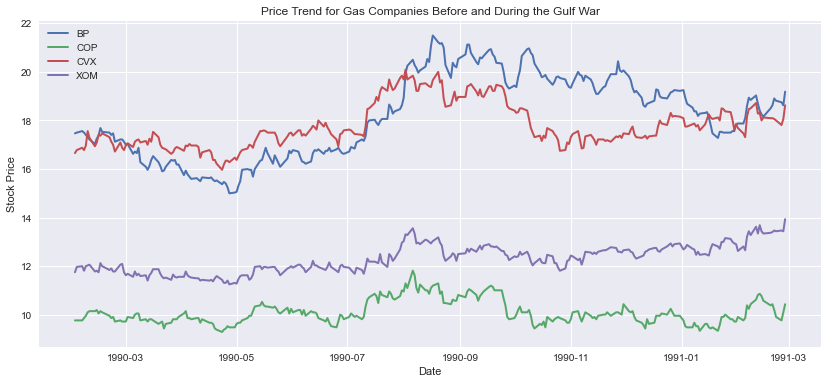

In [49]:
plot_graph(gas_gulf_df, title="Price Trend for Gas Companies Before and During the Gulf War", y_label="Stock Price")

In [42]:
# Get gas stock data for Russia-Ukraine Invasion
tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-24", end="2022-07-31")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
gas_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
gas_rusua_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2021-08-24,55.290001,55.849998,55.009998,55.360001,53.479130,17915600,XOM
2021-08-25,55.240002,55.770000,54.869999,55.459999,53.575733,13270300,XOM
2021-08-26,55.200001,55.540001,54.630001,54.709999,52.851212,11842600,XOM
2021-08-27,55.400002,56.209999,55.400002,55.770000,53.875202,15822500,XOM
2021-08-30,56.240002,56.340000,55.119999,55.160000,53.285923,14086100,XOM
...,...,...,...,...,...,...,...
2022-07-25,145.699997,148.610001,144.179993,148.479996,148.479996,6210900,CVX
2022-07-26,149.500000,150.679993,146.529999,147.320007,147.320007,6112800,CVX
2022-07-27,148.339996,150.199997,146.660004,149.259995,149.259995,6223000,CVX


In [44]:
# Convert dataframe to csv
gas_rusua_df.to_csv("gas_rusua.csv")

In [45]:
gas_rusua_df = gas_rusua_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [46]:
gas_rusua_df = gas_rusua_df.pivot(columns = "ticker", values = "Close")

In [47]:
gas_rusua_df

ticker,BP,COP,CVX,XOM
Date,,,,
2021-08-24,24.650000,55.410000,97.839996,55.360001
2021-08-25,24.629999,56.020000,98.510002,55.459999
2021-08-26,24.299999,55.130001,97.220001,54.709999
2021-08-27,24.940001,56.740002,98.639999,55.770000
2021-08-30,24.700001,56.200001,98.389999,55.160000
...,...,...,...,...
2022-07-25,28.120001,92.050003,148.479996,89.980003
2022-07-26,28.070000,91.089996,147.320007,89.629997
2022-07-27,28.760000,93.269997,149.259995,91.570000


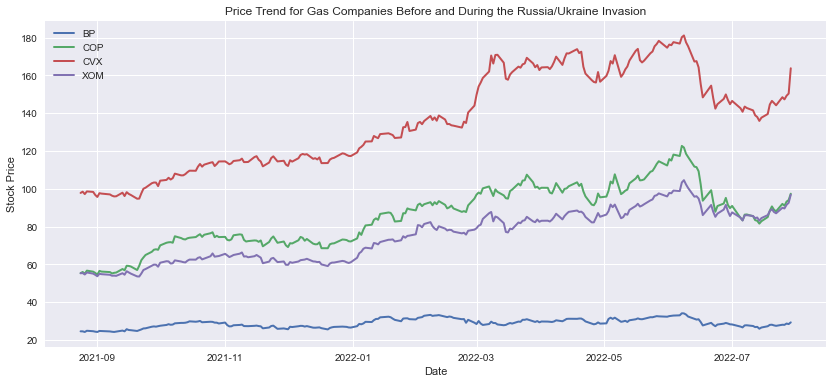

In [48]:
plot_graph(gas_rusua_df, title="Price Trend for Gas Companies Before and During the Russia/Ukraine Invasion", y_label="Stock Price")